In [1]:
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_aw_custs = pd.read_csv('./AdvWorksCusts.csv')
df_aw_spend = pd.read_csv('./AW_AveMonthSpend.csv')
df_aw_bike_buyer = pd.read_csv('./AW_BikeBuyer.csv')

In [3]:
print(df_aw_custs.head())
print(df_aw_spend.head())
print(df_aw_bike_buyer.head())

   CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName  \
0      3761 N. 14th St          NaN  Rockhampton        Queensland   
1           2243 W St.          NaN      Seaford          Victoria   
2     5844 Linden Land          NaN       Hobart          Tasmania   
3     1825 Village Pl.          NaN   North Ryde   New South Wales   
4  7553 Harness Circle          NaN   Wollongong   New South Wales   

       ...        BirthDate   Education    Occupation Gender MaritalStatus  \
0      ...       1966-04-08  Bachelors   Professional      M             M   
1      ...       1965-05-14  Bachelors   Professional   

In [4]:
print(df_aw_spend.describe())
print(df_aw_spend.shape)
print(df_aw_spend.CustomerID.unique().shape)

         CustomerID  AveMonthSpend
count  16519.000000   16519.000000
mean   20234.225195      72.405957
std     5342.515987      27.285370
min    11000.000000      22.000000
25%    15604.500000      52.000000
50%    20221.000000      68.000000
75%    24860.500000      84.000000
max    29482.000000     176.000000
(16519, 2)
(16404,)


In [5]:
df_aw_spend.drop_duplicates(inplace=True, keep='last', subset="CustomerID")


In [6]:
df_aw_spend.describe()

,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.391002
std,5340.370705,27.269921
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000


In [7]:
df_aw_spend.AveMonthSpend.mean()

72.39100219458669

In [8]:
df_aw_spend.AveMonthSpend.median()

68.0

In [9]:
print(df_aw_bike_buyer.describe())
print(df_aw_bike_buyer.shape)
print(df_aw_bike_buyer.CustomerID.unique().shape)

         CustomerID     BikeBuyer
count  16519.000000  16519.000000
mean   20234.225195      0.332284
std     5342.515987      0.471046
min    11000.000000      0.000000
25%    15604.500000      0.000000
50%    20221.000000      0.000000
75%    24860.500000      1.000000
max    29482.000000      1.000000
(16519, 2)
(16404,)


In [10]:
df_aw_bike_buyer.drop_duplicates(inplace=True, keep='last', subset="CustomerID")

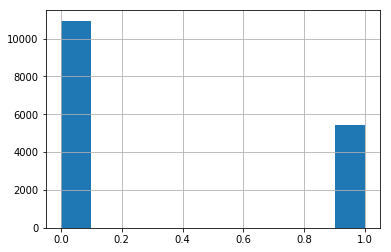

In [11]:
df_aw_bike_buyer.BikeBuyer.hist()

In [12]:
print(df_aw_custs.shape)
print(df_aw_custs.CustomerID.unique().shape)

(16519, 23)
(16404,)


In [13]:
df_aw_custs.drop_duplicates(inplace=True, keep='last', subset="CustomerID")

In [14]:
df_aw_custs[["YearlyIncome", "Occupation"]].groupby("Occupation").median()

,YearlyIncome
Occupation,
Clerical,49481.0
Management,118781.0
Manual,21722.0
Professional,99058.0
Skilled Manual,66471.5


In [15]:
df_aw_spend.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [16]:
df_aw_custs.set_index("CustomerID", inplace=True)
df_aw_spend.set_index("CustomerID", inplace=True)

In [17]:
print(df_aw_spend.head())

df_joined = df_aw_custs.join(df_aw_spend)
print(df_joined[["AveMonthSpend"]].head())

            AveMonthSpend
CustomerID               
11000                  89
11001                 117
11002                 123
11003                  50
11004                  95
            AveMonthSpend
CustomerID               
11000                  89
11001                 117
11002                 123
11003                  50
11004                  95


In [18]:
print(df_joined.columns)
df_joined[["Gender", "AveMonthSpend", "BirthDate"]]
df_joined.dtypes


Index(['Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend'],
      dtype='object')


Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
dtype: object

## Process age

In [19]:
def age_group(age):
    if age < 25:
        return "<25"
    elif age < 45:
        return "25-45"
    elif age < 55:
        return "45-55"
    else:
        return ">=55"

In [20]:
def process_age(data):
    data["Age"] = (pd.Timestamp("1998-01-01") - pd.to_datetime(df_joined["BirthDate"])).astype('<m8[Y]').astype("int")
    data["AgeGroup"] = data["Age"].map(age_group)

In [22]:
process_age(df_joined)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023CDC117198>]],
      dtype=object)

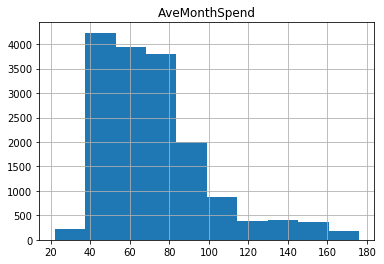

In [23]:
df_joined[["AgeGroup", "AveMonthSpend", "Gender"]].hist()


In [24]:
df_joined[["AgeGroup", "AveMonthSpend", "Gender"]].groupby(["AgeGroup", "Gender"]).sum()

AveMonthSpend
AgeGroup Gender               
25-45    F              293929
         M              473092
45-55    F               70079
         M              109613
<25      F               70476
         M              107683
>=55     F               24935
         M               37695

In [ ]:
df_joined[["AgeGroup", "AveMonthSpend", "Gender"]].groupby(["AgeGroup", "Gender"]).describe()

In [ ]:
sns.barplot(data=df_joined[["AgeGroup", "AveMonthSpend", "Gender"]], y="AveMonthSpend", x="AgeGroup", hue="Gender")

In [ ]:
def plot_box(auto_prices, cols, col_y = 'price'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=auto_prices, palette='RdBu_r')
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        

In [ ]:
cat_cols = ['Gender', 'MaritalStatus', 'Occupation', 'NumberCarsOwned', 'NumberChildrenAtHome']
plot_box(df_joined, cat_cols, col_y="AveMonthSpend")    

In [ ]:
df_aw_bike_buyer.set_index("CustomerID", inplace=True)
df_joined = df_joined.join(df_aw_bike_buyer)


In [ ]:
cat_cols = ['BikeBuyer']
plot_box(df_joined, cat_cols, col_y="YearlyIncome")    

In [ ]:
cat_cols = ['BikeBuyer']
plot_box(df_joined, cat_cols, col_y="NumberCarsOwned")

In [ ]:
df_joined[['BikeBuyer', 'NumberCarsOwned']].groupby('BikeBuyer').median()


In [ ]:
df_joined[['BikeBuyer', 'Occupation']].groupby('Occupation').describe()

In [ ]:
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

In [ ]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

In [ ]:
print(df_joined.head())
print(df_joined.columns)


In [ ]:
labels = np.array(df_joined['BikeBuyer'])

In [ ]:
df_joined[["YearlyIncome","MaritalStatus", "Gender", "NumberCarsOwned", "Age", "AveMonthSpend"]].head()

In [ ]:
cat_cols = ['BikeBuyer']
plot_box(df_joined, cat_cols, col_y="AveMonthSpend")

## Translating features to numpy array

In [ ]:
def build_features_array(data, enc_cols, no_enc_cols):
    features = np.empty((len(data),0))
    print(features.shape)
    for col in enc_cols:
        encoded = encode_string(df_joined[col])
        print(encoded.shape)
        features = np.concatenate([features, encoded], axis = 1)
    features = np.concatenate([features, np.array(df_joined[no_enc_cols])], axis = 1)
    print(features.shape)
    return features

In [ ]:
enc_cols = ['MaritalStatus', 'Gender', 'AgeGroup']
no_enc_cols = ["YearlyIncome", "AveMonthSpend", "NumberChildrenAtHome"]
Features = build_features_array(df_joined, enc_cols, no_enc_cols)


In [ ]:
Features.shape

In [ ]:
Features[:20, :]

In [ ]:
nr.seed(9988)
size = (int(Features.shape[0] * 0.3))
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = size)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
X_train[:10]

## Scaling 

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train[:,4:])
X_train[:,4:] = scaler.transform(X_train[:,4:])
X_test[:,4:] = scaler.transform(X_test[:,4:])
X_train[:10,]

In [ ]:
sns.pairplot(pd.DataFrame(X_train))

In [ ]:
sns.pairplot(pd.DataFrame(X_train[:,4:7]))

In [ ]:
import sklearn.metrics as sklm
import sklearn.decomposition as skde

In [ ]:
pca_model = skde.PCA()
pca_fit = pca_model.fit(X_train[:,4:7])
print(pca_fit.explained_variance_ratio_)

In [ ]:
transformed_X = pca_fit.transform(X_train[:,4:7])
transformed_X = np.concatenate([X_train[:,0:4], transformed_X,X_train[:,7:]], axis=1)
print(X_train.shape)
print(transformed_X.shape)
sns.pairplot(pd.DataFrame(transformed_X))

In [ ]:
inside = ms.KFold(n_splits=5, shuffle = True)
outside = ms.KFold(n_splits=5, shuffle = True)

param_grid = {"class_weight":[{0:0.4, 1:0.6},{0:0.45, 1:0.55},{0:0.35, 1:0.65},{0:0.3, 1:0.7}], "C": [70.0,80.0,90.0,100.0,200.0]}

logistic_mod = linear_model.LogisticRegression() 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = logistic_mod, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)

clf.fit(X_train, y_train)
print(clf.best_estimator_.class_weight)
print(clf.best_estimator_.C)


In [ ]:
lr_model = linear_model.LogisticRegression(class_weight=clf.best_estimator_.class_weight, C=clf.best_estimator_.C)
lr_model.fit(X_train, y_train)

In [ ]:
probabilities = lr_model.predict_proba(X_test)
print(probabilities[:15,:])

In [ ]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.50)
print(np.array(scores[:20]))
print(y_test[:20])

In [ ]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores) 

In [ ]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)    

In [ ]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.6, 0.5, 0.3]
for t in thresholds:
    test_threshold(probabilities, y_test, t)

In [ ]:
from sklearn.svm import LinearSVC, SVC

In [ ]:
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

In [ ]:
svm_pred = svm_model.predict(X_test)

In [ ]:
print(svm_pred[:30])
print(y_test[:30])

In [ ]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('             Score 0   Score 1')
    print('Actual 0      %6d' % conf[0,0] + '       %5d' % conf[0,1] )
    print('Actual 1      %6d' % conf[1,0] + '       %5d' % conf[1,1] )
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('         Score 0     Score 1 ')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] )
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] )
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] )
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] )

In [ ]:
print_metrics_3(y_test, svm_pred)

In [ ]:
inside = ms.KFold(n_splits=5, shuffle = True)
outside = ms.KFold(n_splits=5, shuffle = True)

In [ ]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [5, 10, 15], "gamma":[1.0/25], "class_weight":[{0:0.35, 1:0.65}]}
## Define the SVM model
svc_clf = SVC() 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = svc_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(X_train, y_train)
print(clf.best_estimator_.C)
print(clf.best_estimator_.gamma)
print(clf.best_estimator_.class_weight)

In [ ]:
cv_estimate = ms.cross_val_score(clf, X_test, y_test, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

In [ ]:
svm_mod = SVC(C = clf.best_estimator_.C,
                  gamma = clf.best_estimator_.gamma,
                  class_weight = clf.best_estimator_.class_weight,
                  probability=True) 
svm_mod.fit(X_train, y_train)

In [ ]:
svm_pred = svm_mod.predict(X_test)
print_metrics_3(y_test, svm_pred)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
param_grid = {#"alpha":[0.0000001,0.000001,0.00001], 
              #"early_stopping":[True, False], 
              "beta_1":[0.95,0.90,0.80], 
              "beta_2":[0.999,0.9,0.8]}

## Define the Neural Network model
nn_clf = MLPClassifier(hidden_layer_sizes = (100,100),
                       max_iter=300)

## Perform the grid search over the parameters
nn_clf = ms.GridSearchCV(estimator = nn_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'recall',
                      return_train_score = True)
nn_clf.fit(X_train, y_train)
#print(nn_clf.best_estimator_.alpha)
#print(nn_clf.best_estimator_.early_stopping)
print(nn_clf.best_estimator_.beta_1)
print(nn_clf.best_estimator_.beta_2)

In [ ]:
cv_estimate = ms.cross_val_score(nn_clf, X_train, y_train, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

In [ ]:
nn_mod = MLPClassifier(hidden_layer_sizes = (100,100), 
                       #alpha = nn_clf.best_estimator_.alpha, 
                       #early_stopping = nn_clf.best_estimator_.early_stopping, 
                       beta_1 = nn_clf.best_estimator_.beta_1, 
                       beta_2 = nn_clf.best_estimator_.beta_2,
                       max_iter = 300)
nn_mod.fit(X_train, y_train)

In [ ]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = nn_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)  

In [ ]:
df_aw_test = pd.read_csv('./AW_test.csv')

In [ ]:
df_aw_test.head()

In [ ]:
df_aw_test.set_index("CustomerID", inplace=True)